In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots we will create

df = pd.read_csv(r'C:\Users\Mondre\Desktop\Python\movies.csv')


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Is there any missing data?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


Data Cleaning

In [4]:
# Check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change data types

df['votes'] = df['votes'].fillna(0).astype('int64')

df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

df['runtime'] = df['runtime'].fillna(0).astype('int64')

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [6]:
# Add column to fix year by extracting the year from release year (release year and year do not match)

df = df.dropna()
df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [7]:
# Sort data by gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [8]:
# Change settings to view all data

pd.set_option('display.max_rows', None)

In [9]:
# Drop duplicates

df.drop_duplicates()

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


Create scatterplot to begin correlation inspection

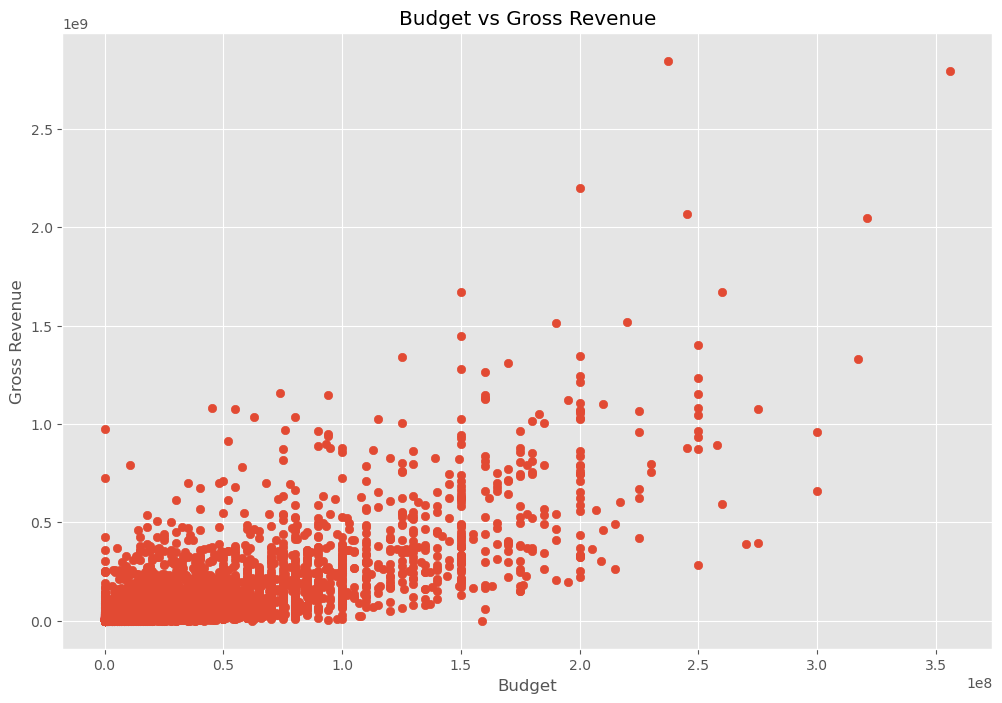

In [10]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show()

Create regplot to check if there is a positive correlation

<AxesSubplot:xlabel='budget', ylabel='gross'>

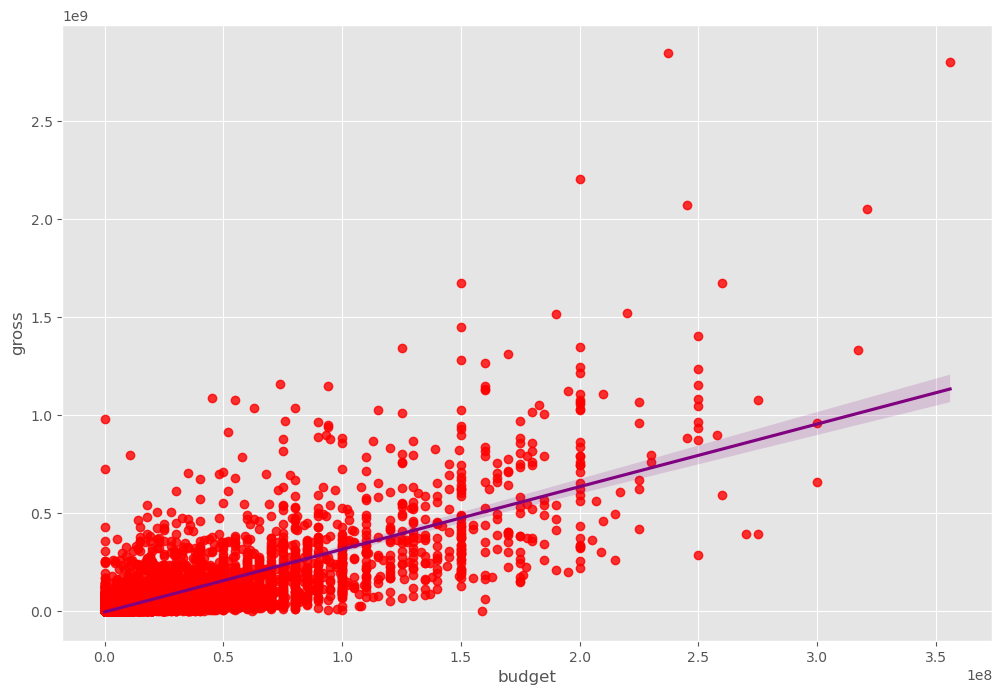

In [11]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'purple'})

Check correlation between numeric values and display using a heatmap

In [12]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.102175,0.226837,0.314867,0.264663,0.119607,0.997467
score,0.102175,1.000000,0.411938,0.056721,0.188278,0.400518,0.109646
votes,0.226837,0.411938,1.000000,0.485280,0.632990,0.308908,0.222260
budget,0.314867,0.056721,0.485280,1.000000,0.750541,0.269169,0.305556
gross,0.264663,0.188278,0.632990,0.750541,1.000000,0.244585,0.257652
runtime,0.119607,0.400518,0.308908,0.269169,0.244585,1.000000,0.119317
year_correct,0.997467,0.109646,0.222260,0.305556,0.257652,0.119317,1.000000


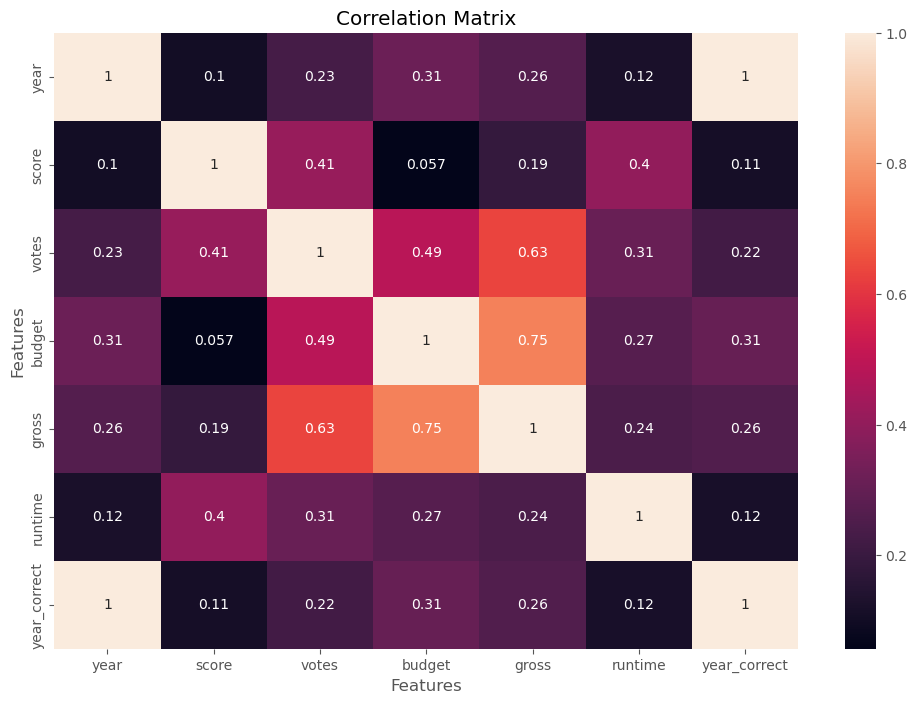

In [13]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

Convert all values to numeric values to check correlation and display it with a heatmap

In [14]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,527,5,0,2009,688,7.8,1100000,1137,1756,2283,55,237000000,2847246203,2208,162,2009
7445,529,5,0,2019,180,8.4,903000,160,729,2192,55,356000000,2797501328,1571,181,2019
3045,6812,5,6,1997,696,7.8,1100000,1137,1756,1560,55,200000000,2201647264,2208,194,1997
6663,5076,5,0,2015,690,7.8,876000,1107,2518,508,55,245000000,2069521700,1505,138,2015
7244,530,5,0,2018,189,8.4,897000,160,729,2192,55,321000000,2048359754,1571,149,2018


In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,527,5,0,2009,688,7.8,1100000,1137,1756,2283,55,237000000,2847246203,2208,162,2009
7445,529,5,0,2019,180,8.4,903000,160,729,2192,55,356000000,2797501328,1571,181,2019
3045,6812,5,6,1997,696,7.8,1100000,1137,1756,1560,55,200000000,2201647264,2208,194,1997
6663,5076,5,0,2015,690,7.8,876000,1107,2518,508,55,245000000,2069521700,1505,138,2015
7244,530,5,0,2018,189,8.4,897000,160,729,2192,55,321000000,2048359754,1571,149,2018


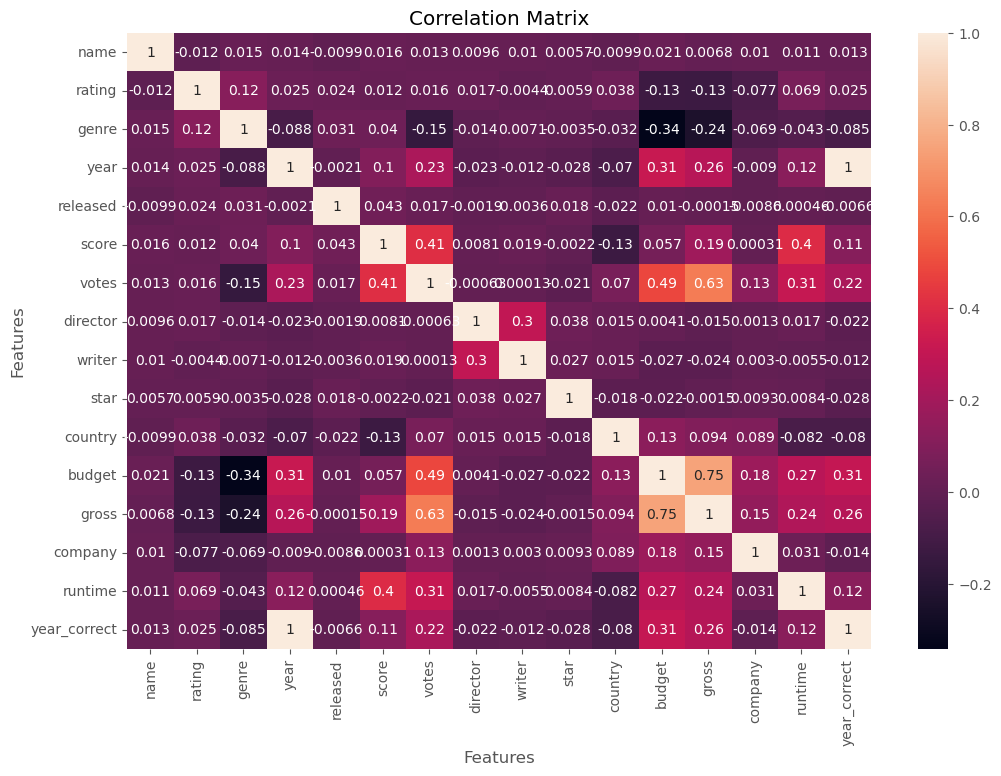

In [16]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

Find high correlations by sorting the data

In [17]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.011926,0.015273,0.013532,-0.009912,0.016160,0.013176,0.009608,0.010240,0.005685,-0.009931,0.020833,0.006813,0.010070,0.011022,0.012728
rating,-0.011926,1.000000,0.117582,0.024963,0.024328,0.011563,0.016093,0.017204,-0.004418,0.005904,0.037727,-0.126813,-0.128904,-0.076808,0.069069,0.025188
genre,0.015273,0.117582,1.000000,-0.088343,0.030695,0.040283,-0.148349,-0.013510,0.007126,-0.003532,-0.031558,-0.342085,-0.240830,-0.068678,-0.043496,-0.084726
year,0.013532,0.024963,-0.088343,1.000000,-0.002144,0.102175,0.226837,-0.022760,-0.012146,-0.027682,-0.070200,0.314867,0.264663,-0.009019,0.119607,0.997467
released,-0.009912,0.024328,0.030695,-0.002144,1.000000,0.043232,0.016893,-0.001869,-0.003640,0.018023,-0.022131,0.009975,-0.000151,-0.008573,0.000455,-0.006635
score,0.016160,0.011563,0.040283,0.102175,0.043232,1.000000,0.411938,0.008068,0.018887,-0.002199,-0.130146,0.056721,0.188278,0.000309,0.400518,0.109646
votes,0.013176,0.016093,-0.148349,0.226837,0.016893,0.411938,1.000000,-0.000628,0.000127,-0.020978,0.069565,0.485280,0.632990,0.129593,0.308908,0.222260
director,0.009608,0.017204,-0.013510,-0.022760,-0.001869,0.008068,-0.000628,1.000000,0.297451,0.037570,0.015246,0.004141,-0.015028,0.001337,0.017332,-0.022091
writer,0.010240,-0.004418,0.007126,-0.012146,-0.003640,0.018887,0.000127,0.297451,1.000000,0.026591,0.015011,-0.027080,-0.023873,0.003041,-0.005499,-0.011845
star,0.005685,0.005904,-0.003532,-0.027682,0.018023,-0.002199,-0.020978,0.037570,0.026591,1.000000,-0.017623,-0.021928,-0.001471,0.009317,0.008422,-0.028095


In [18]:
# Sort correlation pairs

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.011926
      genre       0.015273
      year        0.013532
      released   -0.009912
dtype: float64

In [19]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.342085
genre   budget   -0.342085
        gross    -0.240830
gross   genre    -0.240830
votes   genre    -0.148349
dtype: float64

Find categories with high correlation

In [20]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes         gross           0.632990
gross         votes           0.632990
budget        gross           0.750541
gross         budget          0.750541
year_correct  year            0.997467
year          year_correct    0.997467
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

It seems that the gross revenue has high correlations with votes and budget. The rest of the data do not seem to have high correlations.